<!-- Web scraping  -->


# Webscraping



In [37]:
from selenium.webdriver.common.by import By
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
from selenium.common.exceptions import TimeoutException
import time


In [38]:
driver = webdriver.Chrome()

In [39]:
driver.get('https://www.linkedin.ca')

In [40]:
#login
#driver.find_element(By.XPATH, '/html/body/header/div/div/div[2]/div/button').click() 


In [41]:
#Inserting email account

email = driver.find_element(By.XPATH,'/html/body/main/section[1]/div/div/form/div[1]/div[1]/div/div/input')

email.send_keys("email")

sleep(2)

# Isert Password

password = driver.find_element(By.XPATH,'/html/body/main/section[1]/div/div/form/div[1]/div[2]/div/div/input')

password.send_keys("password")

sleep(2)

driver.find_element(By.XPATH,'/html/body/main/section[1]/div/div/form/div[2]/button').click()



In [42]:
# click on job nevigator

driver.find_element(By.XPATH, '/html/body/div[5]/header/div/nav/ul/li[3]/a').click()



In [43]:
#search job product management position

search = driver.find_element(By.XPATH, '/html/body/div[5]/header/div/div/div/div[2]/div[2]/div/div/input[1]')

search.send_keys('product manager')
search.send_keys(Keys.ENTER)

### Start Scraping for product manager position



In [50]:


# Define the retry_click function
def retry_click(element, retries=3, delay=2):
    for _ in range(retries):
        try:
            element.click()
            return True
        except TimeoutException:
            print("TimeoutException: Retrying...")
            time.sleep(delay)
    return False

# Initialize lists to store job details
positions = []
titles = []
companies = []
cities = []
sites = []
descriptions = []
job_details = []

# Wait for the job container to be visible
wait = WebDriverWait(driver, 10)
job_container = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'scaffold-layout__list-container')))

# Find job elements using a combination of relative XPath and CSS selectors
job_elements = job_container.find_elements(By.XPATH, ".//ul/li/div[contains(@class, 'job-card-container')]")

# Loop through each job element
for job_element in job_elements:
    # Retry clicking on the job element with a delay
    if not retry_click(job_element):
        continue  # Skip to the next iteration if clicking fails

    sleep(2)  # Add a short delay for the page to load

# Now continue with your existing code
page = 0
for _ in range(200):
    # Loop over pages
    print(page)
    try:
        driver.get(f'https://www.linkedin.com/jobs/search/?currentJobId=3834031772&keywords=product%20manager&origin=JOBS_HOME_SEARCH_BUTTON&refresh=true&start={page}')
        sleep(6)
        page += 25
        
        # Wait for the job container to be visible
        wait = WebDriverWait(driver, 10)
        job_container = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'scaffold-layout__list-container')))
    
        job_container = driver.find_element(By.CLASS_NAME, 'scaffold-layout__list-container')
        i = 1
        for _ in range(25):
            # Combine expected conditions for visibility and clickability
            job_element = wait.until(EC.element_to_be_clickable((By.XPATH, f'/html/body/div[5]/div[3]/div[4]/div/div/main/div/div[2]/div[1]/div/ul/li[{i}]/div/div')))
            if not retry_click(job_element):
                continue  # Skip to the next iteration if clicking fails
            sleep(2)
            soup = BeautifulSoup(driver.page_source, 'html.parser')

            # Extract job details
            positions.append("Product manager")
            
            try:
                title = soup.find('span', class_='job-details-jobs-unified-top-card__job-title-link').get_text(strip=True)
                titles.append(title)
            except:
                titles.append('none')
                
            try:
                description = soup.find('div', {'id':'job-details'}).span.get_text()
                descriptions.append(description)
            except:
                descriptions.append('none')
                
            try:
                job_details.append(soup.find('li', class_='job-details-jobs-unified-top-card__job-insight job-details-jobs-unified-top-card__job-insight--highlight').span.get_text(strip=True))
            except:
                job_details.append('No entry')

            print(i)
            i += 1
     
            # Keep scrolling down to read all jobs
            driver.execute_script("arguments[0].scrollIntoView({behavior: 'auto',block: 'end'});", job_container)
            
            sleep(1)  # Add a short delay to avoid overwhelming the server
        
        # Grab company name
        for company in soup.find_all('div', class_='artdeco-entity-lockup__subtitle ember-view'):
            try:
                companies.append(company.span.get_text(strip=True))
            except:
                companies.append("none")
                
        # Grab city for each job and site
        for city in soup.find_all('div', class_='artdeco-entity-lockup__caption ember-view'):
            try:
                cities.append(city.ul.li.get_text().split('(')[0].strip())
            except:
                cities.append("none")
                
            try:
                sites.append(city.ul.li.get_text().split('(')[1].split(')')[0].strip())
            except:
                sites.append("not mentioned")
                
    except KeyboardInterrupt:
        print("Script execution interrupted by user")
        break

# Print some statistics
print(f"Total job listings scraped: {len(titles)}")


In [49]:
df = pd.DataFrame(data)
df.to_csv('/Users/irisfabros/Desktop/product.csv', index=False)

# Data Exploration

In [48]:
df = pd.read_csv('product.csv')
df.head()

,Position,Title,Company,City,Site,Description,Job_Detail
0,Product manager,"Associate Product Manager, Revenue",Tinder,"San Francisco, CA",Hybrid,"\nOur MissionAs humans, there are few things m...","$120,000/yr - $140,000/yrHybridFull-timeMatche..."
1,Product manager,Associate Product Manager,Global Industrial Company,"Milwaukee, WI",On-site,\nGlobal IndustrialCorporate OverviewFor over ...,"On-siteFull-timeMatches your job preferences, ..."
2,Product manager,Product Manager I,Coinbase,"New York, NY",not mentioned,"\nAt Coinbase, our mission is to increase econ...","$140,250/yr - $165,000/yrFull-timeMatches your..."
3,Product manager,Associate Product Manager,"Spectrum Brands, Inc",United States,Remote,\nDivision InformationThe Pet Care business un...,"RemoteFull-timeMatches your job preferences, j..."
4,Product manager,Product Manager,Alma,United States,Remote,\nAlma is on a mission to simplify access to h...,"$125,000/yr - $145,000/yrRemoteFull-timeMatche..."


In [51]:


data = {
    'Position': positions,
    'Title': titles,
    'Company': companies,
    'City': cities,
    'Site': sites,
    'Description': descriptions,
    'Job_Detail': job_details
}

df = pd.DataFrame(data)
df.to_csv('/Users/irisfabros/Desktop/product.csv', index=False)

# Clean Data

In [151]:
job_details

salaries = []

for x in job_details:
    if x[0] == '$':
        salaries.append(" ".join(x.split('/')[:2]).replace('yr',''))
    else:
        salaries.append('no salary')
        
salaries

In [152]:
job_details
level = []

for x in job_details:
    if 'level' in x.lower():
        level.append(" ".join(x.lower().split('level')).split()[-1].split('.')[-1])
    else:
        level.append('no level')
        
level

In [153]:
job_details
jobtype = []

for x in job_details:
    if 'level' in x.lower():
        jobtype.append(" ".join(x.lower().split('level')).split()[-1].split('.')[0])
    else:
        jobtype.append('none')
        
jobtype

In [56]:
job_soft_skills = []
job_technical_skills = []
soft_skills = ['communication', 'leadership', 'problem solving', 'strategy', 'emotional intelligence', 'prioritization', 'management', 'industry knowledge', 'delegation', 'collaboration', 'agile', 'business acumen', 'time management', 'storytelling', 'writing']
technical_skills = ['prototyping', 'A/B Testing', 'data collection', 'data analysis', 'data visualization', 'sldc', 'devops', 'cloud', 'quality assurance', 'wireframe', 'UI/UX', 'software engineering', 'AI research', 'ML research', 'API development']

i = 0 

for des in descriptions:
# Extract soft skills
    list1=[]
    list2 =[]
    for soft in soft_skills:
        if soft in des:
            list2.append(soft)
    job_soft_skills.append(list2)


    # Extract technical skills
    for skill in technical_skills:
        if skill in des:
             list1.append(skill)
    
    job_technical_skills.append(list1)

                
                
# Print extracted skills
print("Soft Skills:", job_soft_skills)
print("Technical Skills:", job_technical_skills)

Soft Skills: [['strategy', 'management', 'collaboration'], ['strategy', 'agile'], ['communication', 'problem solving', 'prioritization', 'management'], ['communication', 'leadership', 'strategy'], ['communication', 'strategy', 'management', 'agile'], ['communication', 'strategy', 'collaboration'], ['prioritization', 'management'], ['communication', 'strategy', 'management'], ['strategy', 'prioritization', 'management', 'writing'], ['communication', 'collaboration', 'agile'], ['communication', 'problem solving', 'management'], ['management'], ['communication', 'management'], ['communication', 'strategy', 'management', 'time management'], ['communication', 'leadership', 'strategy', 'management', 'collaboration'], ['communication', 'management', 'collaboration', 'storytelling'], ['collaboration'], ['communication', 'problem solving', 'strategy', 'business acumen'], ['communication', 'leadership', 'strategy', 'prioritization', 'management', 'collaboration', 'business acumen'], ['leadership

In [57]:
len(job_technical_skills)

650

In [58]:
data = {
    'Position': positions,
    'Title': titles,
    'Company': companies,
    'City': cities,
     'Site': sites,
     'Job Type': jobtype,
     'Level': level,
    'Description': descriptions,
     'Salary': salaries,
#   'Requirements': requirements,
    'Soft_Skills': job_soft_skills,
    'Technical_Skills': job_technical_skills
}

df_product = pd.DataFrame(data)
df

,Position,Title,Company,City,Site,Description,Job_Detail
0,Product manager,"Associate Product Manager, Revenue",Tinder,"San Francisco, CA",Hybrid,"\nOur MissionAs humans, there are few things m...","$120,000/yr - $140,000/yrHybridFull-timeMatche..."
1,Product manager,Associate Product Manager,Global Industrial Company,"Milwaukee, WI",On-site,\nGlobal IndustrialCorporate OverviewFor over ...,"On-siteFull-timeMatches your job preferences, ..."
2,Product manager,Product Manager I,Coinbase,"New York, NY",not mentioned,"\nAt Coinbase, our mission is to increase econ...","$140,250/yr - $165,000/yrFull-timeMatches your..."
3,Product manager,Associate Product Manager,"Spectrum Brands, Inc",United States,Remote,\nDivision InformationThe Pet Care business un...,"RemoteFull-timeMatches your job preferences, j..."
4,Product manager,Product Manager,Alma,United States,Remote,\nAlma is on a mission to simplify access to h...,"$125,000/yr - $145,000/yrRemoteFull-timeMatche..."
...,...,...,...,...,...,...,...
645,Product manager,Product Manager,Toku,United States,Remote,\nAbout TokuCrypto has had tremendous growth o...,"RemoteFull-timeMatches your job preferences, j..."
646,Product manager,Product Manager - Finance,Quess US,"San Jose, CA",On-site,"\nAs a Product Manager - Finance, you are expe...","On-siteContractMatches your job preferences, j..."
647,Product manager,Associate Product Manager/Product Specialist,INTEGRA Biosciences,"Hudson, NH",On-site,\nDescriptionMeet our US TeamWith over 550 emp...,"On-siteFull-timeMatches your job preferences, ..."
648,Product manager,Product Manager,Vermont Systems,"Essex Junction, VT",not mentioned,\nJoin an established development team and par...,"Full-timeMatches your job preferences, job typ..."


# Data Analysis

In [156]:
#1. How many job postings are hybrid, remote, on-site
#2. Top 10 companies offering remote, hybrid and on-site work
#3. Find out which city has the highest salary( only top three cities)
#4. Find out which city has the lowest salary( only top three cities)
#5.  Find the most required skills( soft and technical skills)
#6. Find out what level companies are hiring
#7. Finding out which ccompanies hires entry-level positions
#8. Find out skills-salary correration (next steps)


In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import Counter

In [67]:
df = pd.read_csv('/Users/irisfabros/Desktop/product.csv')

# Filter the DataFrame to select only the rows where the job position contains "Product Manager"
product_manager_jobs = df[df['Position'].str.contains('Product Manager', case=False)]

# Count the number of product manager job postings per city
job_count_per_city = product_manager_jobs['City'].value_counts().reset_index()
job_count_per_city.columns = ['City', 'Job Count']

# Optionally, calculate the total number of product manager job postings in the country
total_job_count = len(product_manager_jobs)

# Display the results
print("Total product manager job postings in the country:", total_job_count)
print("\nProduct manager job postings per city:")
print(job_count_per_city)

Total product manager job postings in the country: 650

Product manager job postings per city:
                   City  Job Count
0         United States         91
1          New York, NY         51
2     San Francisco, CA         26
3          San Jose, CA         22
4            Austin, TX         20
..                  ...        ...
233  Mount Prospect, IL          1
234           Lisle, IL          1
235        Syracuse, NY          1
236        Leesburg, VA          1
237  Essex Junction, VT          1

[238 rows x 2 columns]


#1. How many job postings are hybrid, remote, on-site

Number of companies offering remote job postings: 2
Number of companies offering hybrid job postings: 2
Number of companies offering on-site job postings: 6


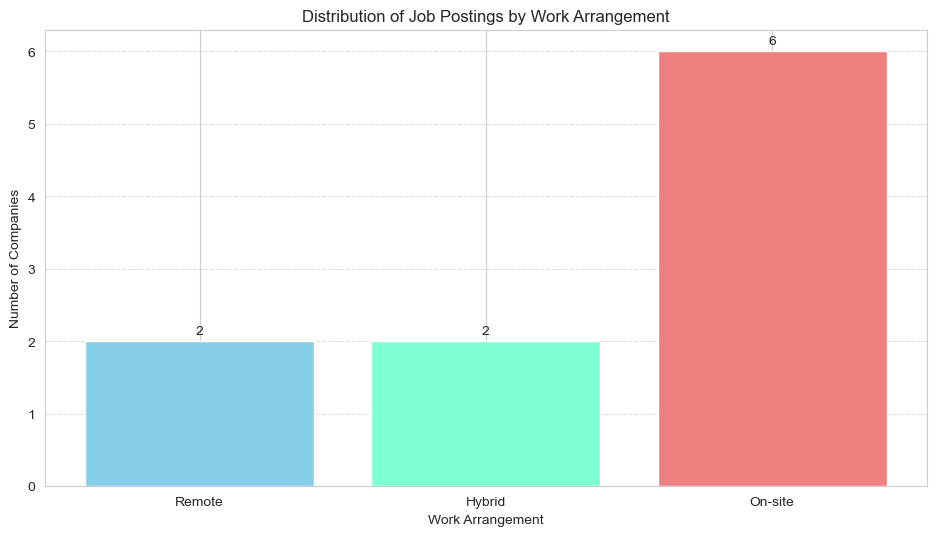

In [108]:
# Define keywords for each category
remote_keywords = ['remote', 'work from home']
hybrid_keywords = ['hybrid', 'partially remote', 'mix of remote and on-site']

# Initialize sets to store unique company names for each category
remote_companies = set()
hybrid_companies = set()
onsite_companies = set()

# Iterate through job descriptions and company names simultaneously
for description, company in zip(descriptions, companies):
    remote_flag = False
    hybrid_flag = False
    
    # Check for remote keywords
    for keyword in remote_keywords:
        if keyword in description.lower():
            remote_companies.add(company)
            remote_flag = True
            break  # Break the loop once a match is found
    
    # Check for hybrid keywords if not already classified as remote
    if not remote_flag:
        for keyword in hybrid_keywords:
            if keyword in description.lower():
                hybrid_companies.add(company)
                hybrid_flag = True
                break  # Break the loop once a match is found
    
    # If not classified as remote or hybrid, consider it as on-site
    if not remote_flag and not hybrid_flag:
        onsite_companies.add(company)

# Print the number of companies for each category
print("Number of companies offering remote job postings:", len(remote_companies))
print("Number of companies offering hybrid job postings:", len(hybrid_companies))
print("Number of companies offering on-site job postings:", len(onsite_companies))

# Define data
categories = ['Remote', 'Hybrid', 'On-site']
counts = [len(remote_companies), len(hybrid_companies), len(onsite_companies)]
colors = ['#87CEEB', '#7FFFD4', '#F08080']  # play around muted colors: sky blue, aquamarine, light coral

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=colors)
plt.title('Distribution of Job Postings by Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Companies')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts above each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center')

# Show plot
plt.tight_layout(pad=3.0)
plt.show()




#2. Top 10 companies offering remote, hybrid and on-site work

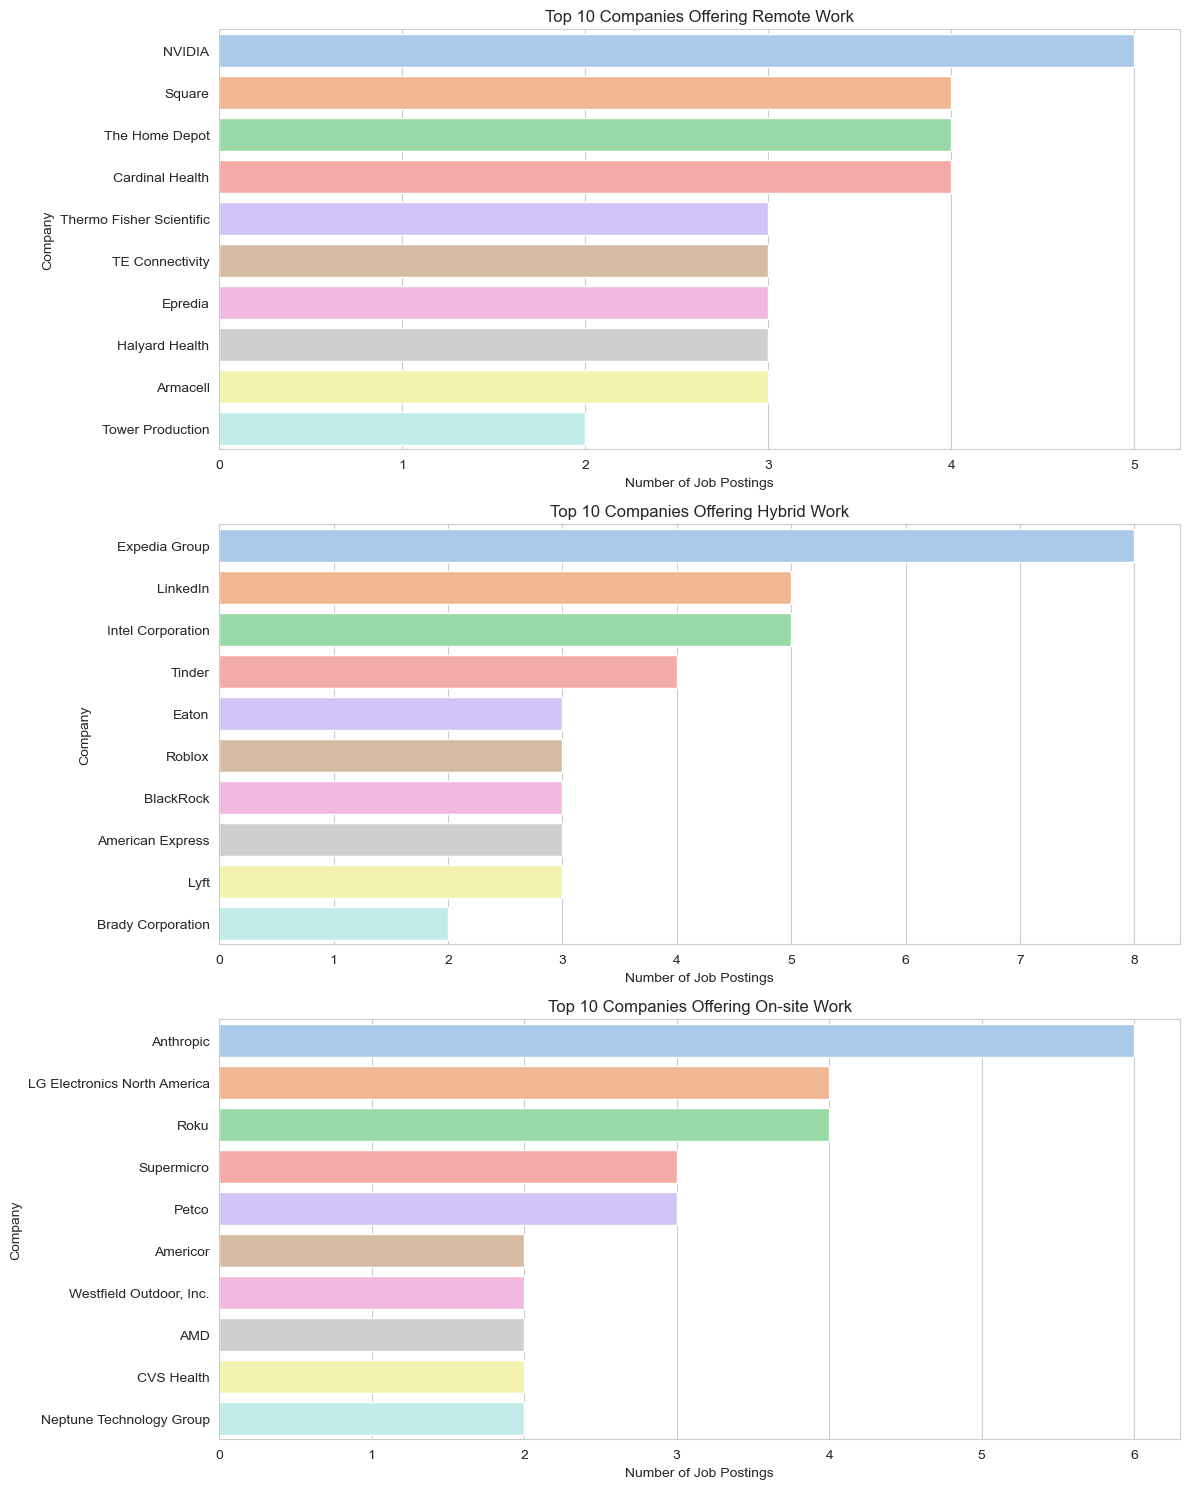

In [109]:
# Extracting work arrangement types from 'Job_Detail' column
work_arrangements = ['remote', 'hybrid', 'on-site']  # Added 'on-site' to the list of arrangements
company_counts = {arrangement: {} for arrangement in work_arrangements}

for arrangement in work_arrangements:
    arrangement_df = df[df['Job_Detail'].str.contains(arrangement, case=False)]
    if len(arrangement_df) > 0:
        company_counts[arrangement] = arrangement_df['Company'].value_counts().head(10)
    else:
        company_counts[arrangement] = pd.Series([])  # Create an empty series if no postings for the arrangement

# Plotting the top 10 companies for each work arrangement type
fig, axs = plt.subplots(3, 1, figsize=(12, 15))  # Increased the number of subplots to accommodate 'on-site'

for idx, arrangement in enumerate(work_arrangements):
    companies = company_counts[arrangement].index
    counts = company_counts[arrangement].values
    
    sns.barplot(x=counts, y=companies, ax=axs[idx], palette='pastel')  # play around colors changed the palette to 'pastel'
    axs[idx].set_title(f'Top 10 Companies Offering {arrangement.capitalize()} Work')
    axs[idx].set_xlabel('Number of Job Postings')
    axs[idx].set_ylabel('Company')

plt.tight_layout()
plt.show()


#2. Find out which city has the most highest salary( only top three cities)


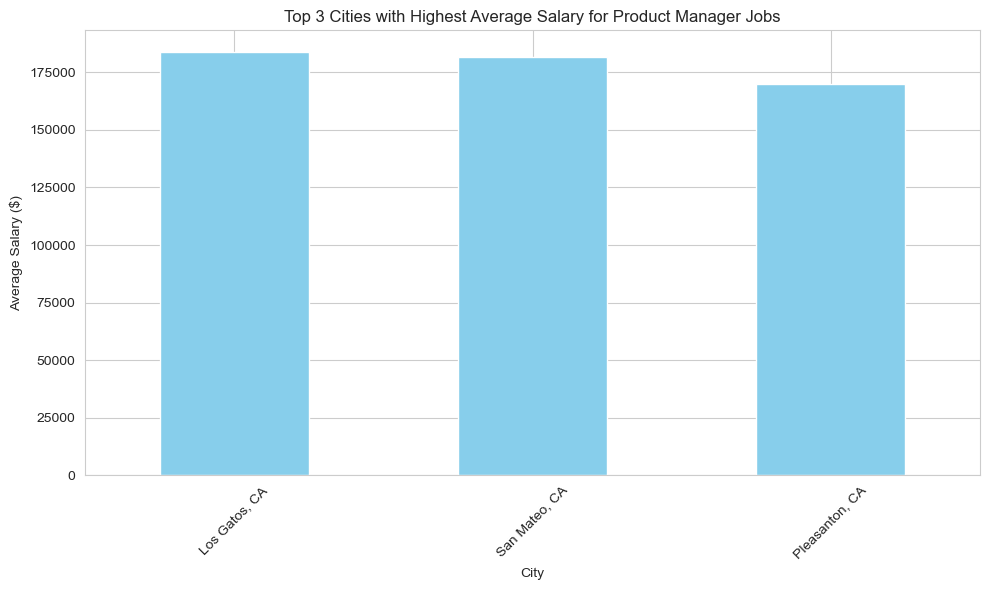

In [82]:


# Extract the salary information from job_details
salaries = []
for detail in job_details:
    if detail.startswith('$'):
        salary = detail.split('/')[0].strip()
        salary = salary.replace('$', '').replace(',', '').replace('k', '000').replace('K', '000')
        salaries.append(float(salary))
    else:
        salaries.append(None)

# Add the salaries to the DataFrame
df['Salary'] = salaries

# Filter out entries with no salary
df_with_salary = df[df['Salary'].notna()]

# Group by city and calculate the average salary for each city
average_salary_per_city = df_with_salary.groupby('City')['Salary'].mean().dropna()

# Sort the cities based on the average salary in descending order
top_cities = average_salary_per_city.sort_values(ascending=False).head(3)

# Plot a bar graph for the top three cities
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 3 Cities with Highest Average Salary for Product Manager Jobs')
plt.xlabel('City')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#3.  Find out which city has the lowest salary( only top three cities)

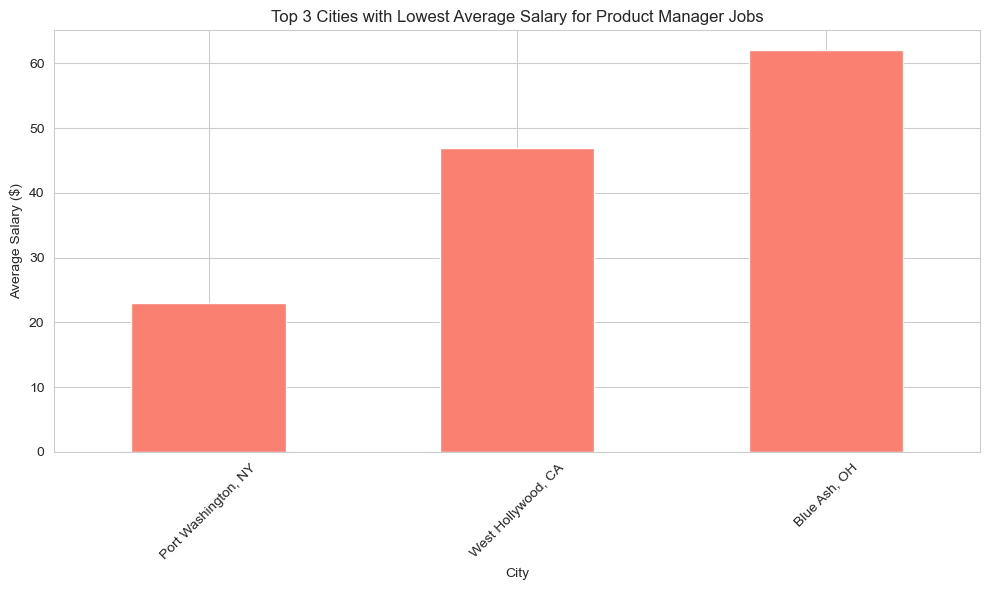

In [83]:

# Extract the salary information from job_details
salaries = []
for detail in job_details:
    if detail.startswith('$'):
        salary = detail.split('/')[0].strip()
        salary = salary.replace('$', '').replace(',', '').replace('k', '000').replace('K', '000')
        salaries.append(float(salary))
    else:
        salaries.append(None)

# Add the salaries to the DataFrame
df['Salary'] = salaries

# Filter out entries with no salary
df_with_salary = df[df['Salary'].notna()]

# Group by city and calculate the average salary for each city
average_salary_per_city = df_with_salary.groupby('City')['Salary'].mean().dropna()

# Sort the cities based on the average salary in ascending order
top_cities = average_salary_per_city.sort_values(ascending=True).head(3)

# Plot a bar graph for the top three cities
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='salmon')
plt.title('Top 3 Cities with Lowest Average Salary for Product Manager Jobs')
plt.xlabel('City')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#5.  Categorize how much percent does each industry have the role

In [155]:
job_industries = []

# List of industry keywords
industries = ['technology', 'finance', 'healthcare', 'retail', 'manufacturing', 'education', 'hospitality', 'consulting', 'media', 'telecommunications', 'real estate', 'automotive', 'energy', 'government', 'nonprofit']

# Iterate through each job description
for des in descriptions:
    # Extract industries from the description
    industries_found = [industry for industry in industries if industry in des.lower()]
    job_industries.append(industries_found)

# Print extracted industries
print("Industries:", job_industries)


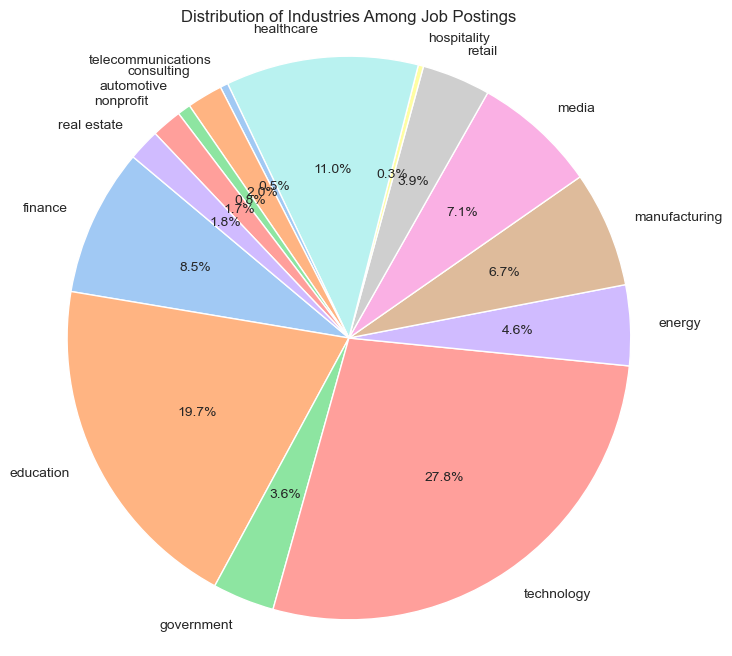

In [110]:
# Categorize how much percent does each industry needs for product managers

# Count the occurrences of each industry
industry_counts = {}
for industries_found in job_industries:
    for industry in industries_found:
        if industry in industry_counts:
            industry_counts[industry] += 1
        else:
            industry_counts[industry] = 1

# Prepare data for pie chart
labels = list(industry_counts.keys())
sizes = list(industry_counts.values())

# Define pastel colors
pastel_colors = sns.color_palette('pastel')

# Create pie chart with pastel colors
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Industries Among Job Postings')
plt.show()


#5.  Find the most required skills( soft and technical skills)

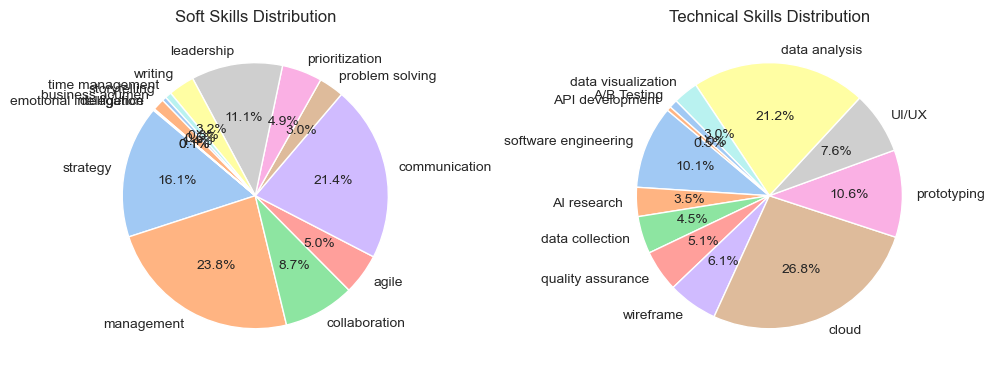

In [111]:
# Calculate the frequency of each soft skill
soft_skill_freq = {}
for skills in job_soft_skills:
    for skill in skills:
        if skill in soft_skill_freq:
            soft_skill_freq[skill] += 1
        else:
            soft_skill_freq[skill] = 1

# Calculate the frequency of each technical skill
technical_skill_freq = {}
for skills in job_technical_skills:
    for skill in skills:
        if skill in technical_skill_freq:
            technical_skill_freq[skill] += 1
        else:
            technical_skill_freq[skill] = 1

# Define nude colors
nude_colors = sns.color_palette('pastel')

# Plotting the pie chart for soft skills
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(soft_skill_freq.values(), labels=soft_skill_freq.keys(), autopct='%1.1f%%', startangle=140, colors=nude_colors)
plt.title('Soft Skills Distribution')

# Plotting the pie chart for technical skills
plt.subplot(1, 2, 2)
plt.pie(technical_skill_freq.values(), labels=technical_skill_freq.keys(), autopct='%1.1f%%', startangle=140, colors=nude_colors)
plt.title('Technical Skills Distribution')

plt.tight_layout()
plt.show()


#6. Find out what level companies are hiring

In [137]:
import re

# Sample job details (replace this with your actual job details column)
job_details = df['Job_Detail']

# Define pattern for extracting level
level_pattern = r'\b(entry|junior|senior|director|lead)\b'

# Initialize a list to store the extracted levels
levels = []

# Iterate through job details to extract levels
for detail in job_details:
    # Extract level using regular expression
    match = re.search(level_pattern, detail, re.IGNORECASE)
    if match:
        levels.append(match.group(1))
    else:
        levels.append('No level')

# Print the extracted levels
for i in range(len(job_details)):
    print(f"Job Detail: {job_details[i]}")
    print(f"Level: {levels[i]}")
    print()



Job Detail: $120,000/yr - $140,000/yrHybridFull-timeMatches your job preferences, job type is Full-time.Associate
Level: No level

Job Detail: On-siteFull-timeMatches your job preferences, job type is Full-time.Entry level
Level: Entry

Job Detail: $140,250/yr - $165,000/yrFull-timeMatches your job preferences, job type is Full-time.Mid-Senior level
Level: Senior

Job Detail: RemoteFull-timeMatches your job preferences, job type is Full-time.
Level: No level

Job Detail: $125,000/yr - $145,000/yrRemoteFull-timeMatches your job preferences, job type is Full-time.Mid-Senior level
Level: Senior

Job Detail: $275,000/yr - $375,000/yrOn-siteFull-timeMatches your job preferences, job type is Full-time.
Level: No level

Job Detail: $75,000/yr - $100,000/yrRemoteFull-timeMatches your job preferences, job type is Full-time.Entry level
Level: Entry

Job Detail: $70,000/yr - $125,500/yrFull-timeMatches your job preferences, job type is Full-time.Associate
Level: No level

Job Detail: RemoteFull-t

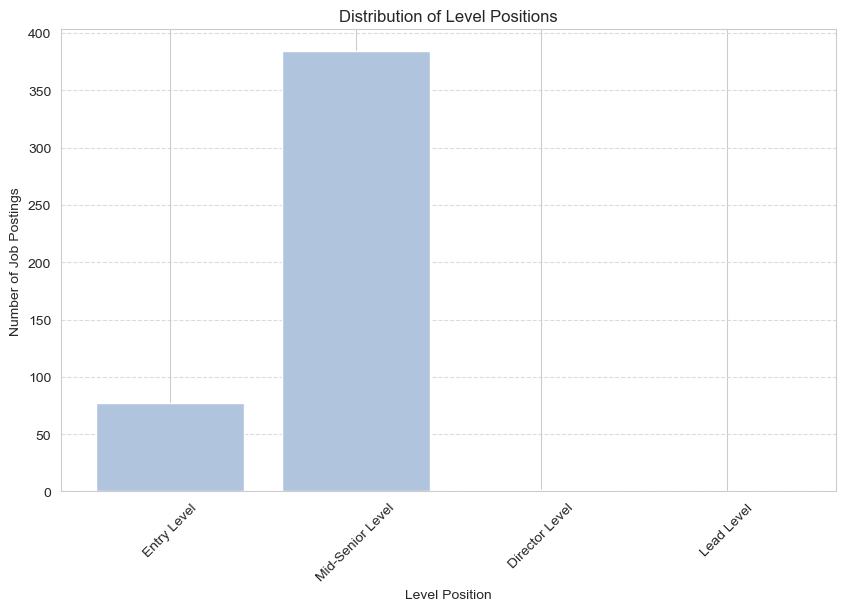

In [140]:
# Define data
job_details_sample = job_details[:10]  # Taking a sample of job details for visualization
levels = ['Entry Level', 'Mid-Senior Level', 'Director Level', 'Lead Level']
level_counts = {level: 0 for level in levels}

# Count level positions
for level in level_positions:
    if 'entry' in level.lower():
        level_counts['Entry Level'] += 1
    elif 'mid' in level.lower() or 'senior' in level.lower():
        level_counts['Mid-Senior Level'] += 1
    elif 'director' in level.lower():
        level_counts['Director Level'] += 1
    elif 'lead' in level.lower():
        level_counts['Lead Level'] += 1

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(level_counts.keys(), level_counts.values(), color='lightsteelblue')
plt.title('Distribution of Level Positions')
plt.xlabel('Level Position')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts above each bar
for level, count in level_counts.items():
    plt


In [141]:
# Initialize a list to store companies hiring entry-level positions
entry_level_companies = []

# Iterate through level_positions and companies simultaneously
for level, company in zip(level_positions, companies):
    if 'entry' in level.lower():
        entry_level_companies.append(company)

# Print the list of companies hiring entry-level positions
print("Companies hiring entry-level positions:", entry_level_companies)




Companies hiring entry-level positions: []


In [156]:


# Sample job details (replace this with your actual job details column)
job_details = df['Job_Detail']

# Define pattern for extracting level
level_pattern = r'\b(entry|junior)\b'

# Initialize a list to store the companies hiring entry-level positions
entry_level_companies = []

# Iterate through job details to extract levels and corresponding companies
for detail, company in zip(job_details, df['Company']):
    # Extract level using regular expression
    match = re.search(level_pattern, detail, re.IGNORECASE)
    if match:
        entry_level_companies.append(company)

# Remove duplicate company entries
entry_level_companies = list(set(entry_level_companies))

# Print the companies hiring entry-level positions
print("Companies hiring entry-level positions:")
for company in entry_level_companies:
    print(company)


#7. Finding out which ccompanies hires entry-level positions

In [160]:
# import numpy as np

# # Sample job details (replace this with your actual job details column)
# job_details = df['Job_Detail']

# # Define pattern for extracting level
# level_pattern = r'\b(entry|junior)\b'

# # Initialize a list to store the companies hiring entry-level positions
# entry_level_companies = []

# # Iterate through job details to extract levels and corresponding companies
# for detail, company in zip(job_details, df['Company']):
#     # Extract level using regular expression
#     match = re.search(level_pattern, detail, re.IGNORECASE)
#     if match:
#         entry_level_companies.append(company)

# # Remove duplicate company entries
# entry_level_companies = list(set(entry_level_companies))

# # Count the number of job postings per company
# company_counts = {company: entry_level_companies.count(company) for company in entry_level_companies}

# # Sort companies based on the number of job postings
# sorted_companies = sorted(company_counts.items(), key=lambda x: x[1], reverse=True)

# # Extract top 10 companies and their counts
# top_10_companies = [company[0] for company in sorted_companies[:10]]
# top_10_counts = [company[1] for company in sorted_companies[:10]]

# # Create color gradient for the bars
# colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_companies)))



/var/folders/6l/px4tgfq947b_1g8ky2xkrkgr0000gn/T/ipykernel_18477/2647520420.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='none') for i in range(len(top_10_companies))]


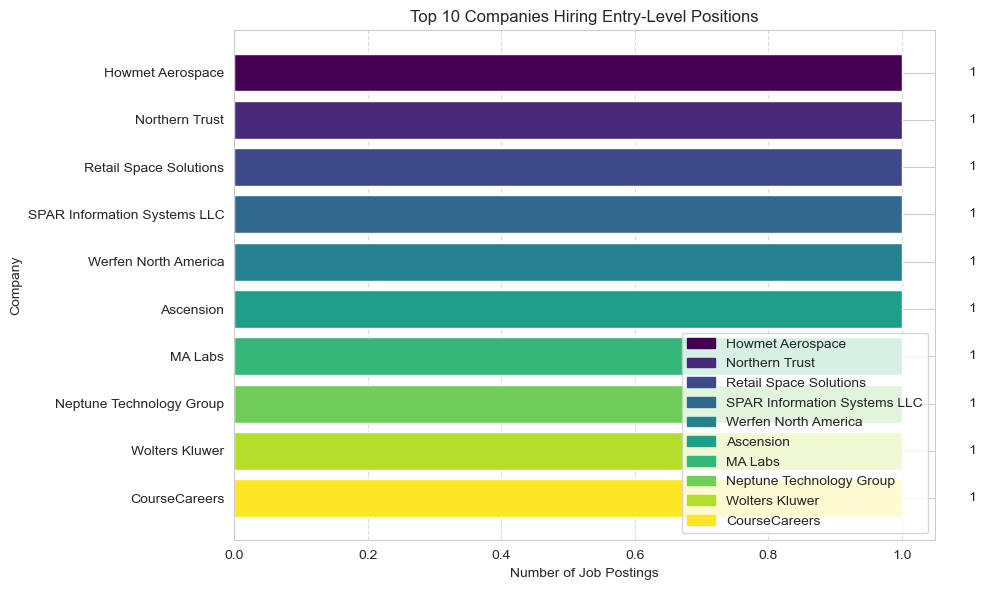

In [159]:
# Plot horizontal bar graph with color gradient
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_companies, top_10_counts, color=colors)
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.title('Top 10 Companies Hiring Entry-Level Positions')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add counts above each bar
for i, count in enumerate(top_10_counts):
    plt.text(count + 0.1, i, str(count), va='center')

# Add custom legend
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='none') for i in range(len(top_10_companies))]
plt.legend(legend_handles, top_10_companies, loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
#END